In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tips (data for regression problem).csv')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


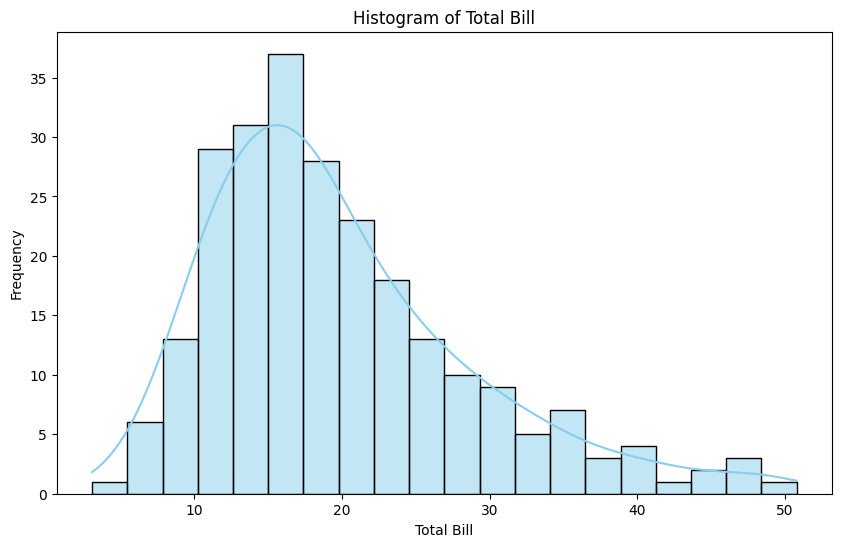

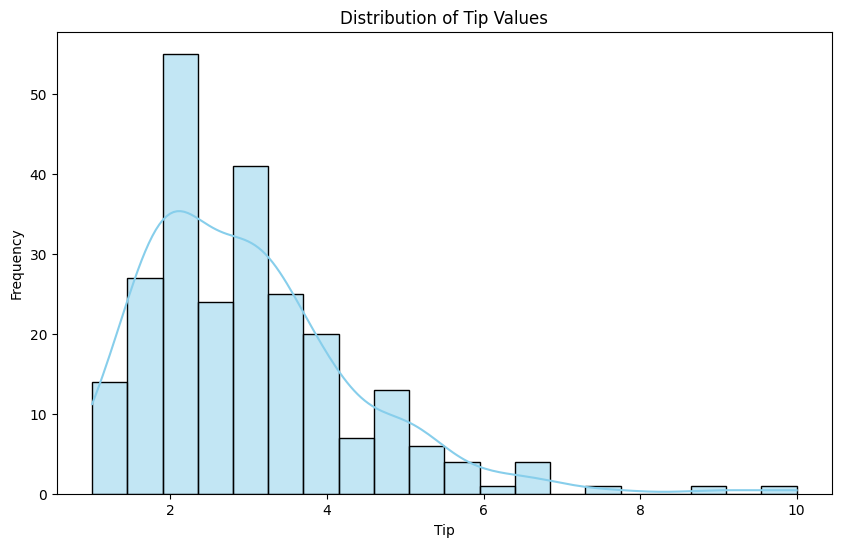

<ipython-input-24-ad7de113d1d2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='sex', palette='pastel')


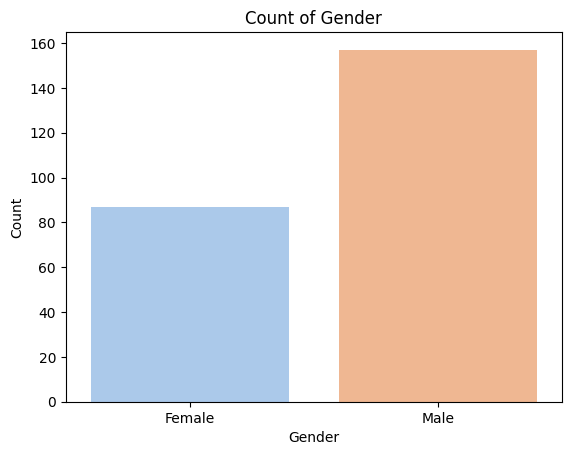

<ipython-input-24-ad7de113d1d2>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='smoker', palette='pastel')


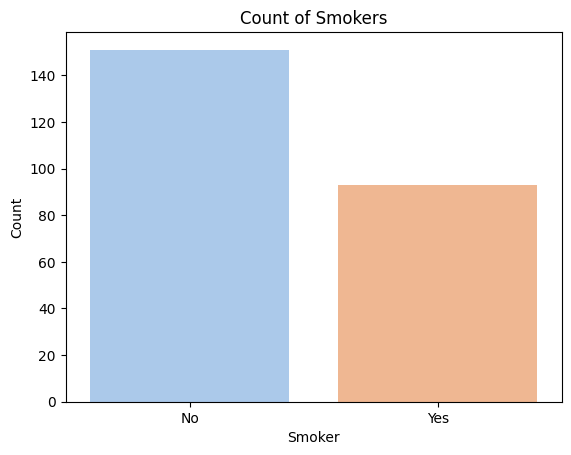

<ipython-input-24-ad7de113d1d2>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='day', palette='pastel')


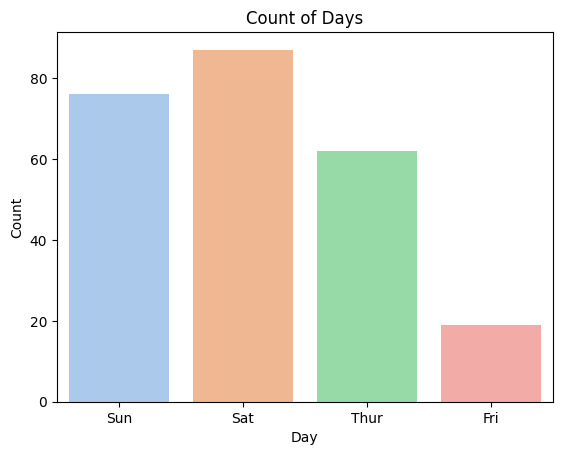

<ipython-input-24-ad7de113d1d2>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='time', palette='pastel')


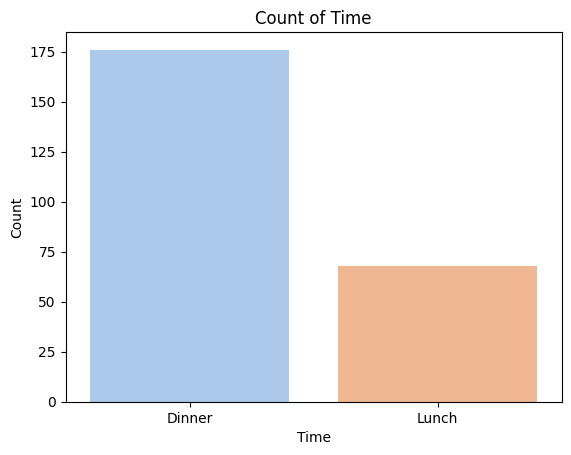

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(data['total_bill'], kde=True, bins=20, color='skyblue')
plt.title('Histogram of Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for tip
plt.figure(figsize=(10, 6))
sns.histplot(data['tip'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Tip Values')
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.show()

sns.countplot(data=data, x='sex', palette='pastel')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

sns.countplot(data=data, x='smoker', palette='pastel')
plt.title('Count of Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

sns.countplot(data=data, x='day', palette='pastel')
plt.title('Count of Days')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

sns.countplot(data=data, x='time', palette='pastel')
plt.title('Count of Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.show()

**Conclusions Drawn from Univariate analysis**

*From first graph* of total bill we can see that the major frequency of lies in the region of 10 to 20 and varies depending on party size, time etc.

The graph Of *frequency of tips* shows that majority of tips lie in the values of 2 to 3 dollars with highest tip values of around 2 dollars.

The *Gender* barplot shows that there are more male customers in the restaurant than female cuatomers which suggests that the restraunt showd focus on increasing its female customers while maintaining the number of male customers.

The *Day barplot* shows that most sales in the restraunt occurs on saturday mabye as it is a weekend followed by sunday

The *time barplot* shows that most sales occur during time as compared to lunch time

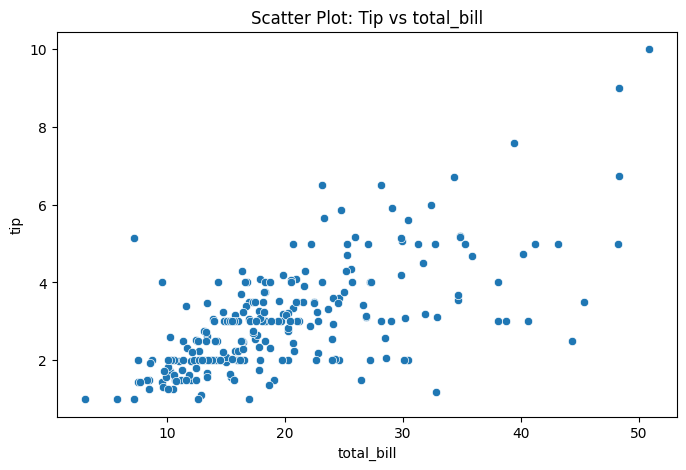

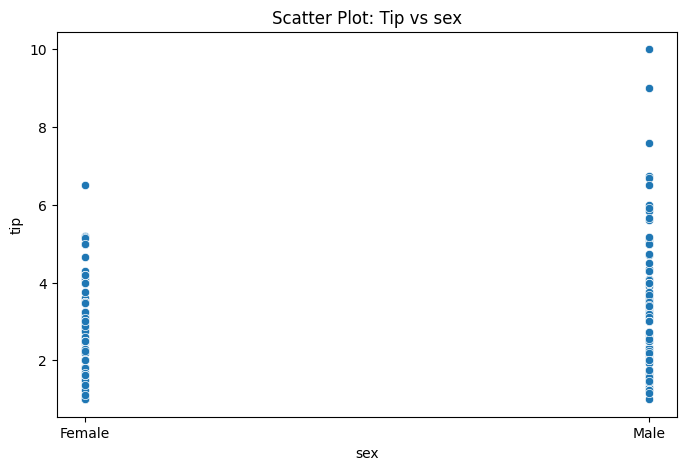

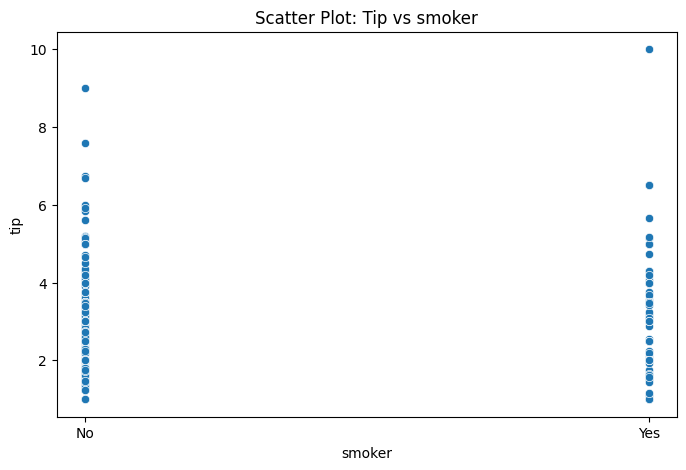

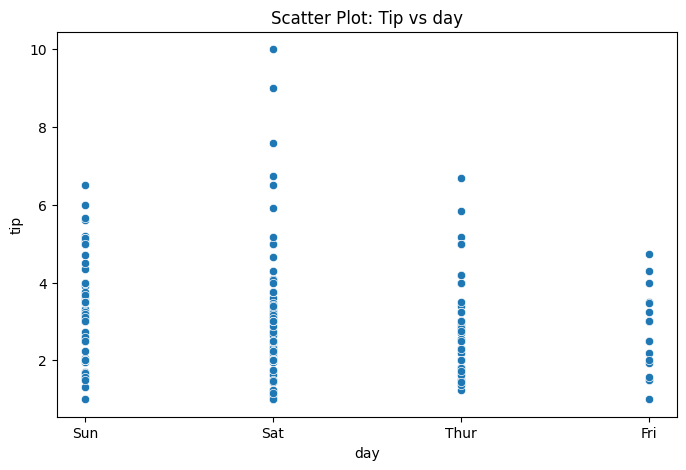

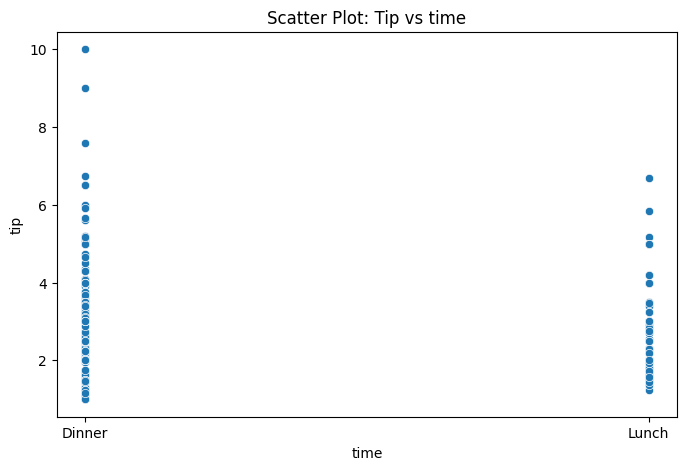

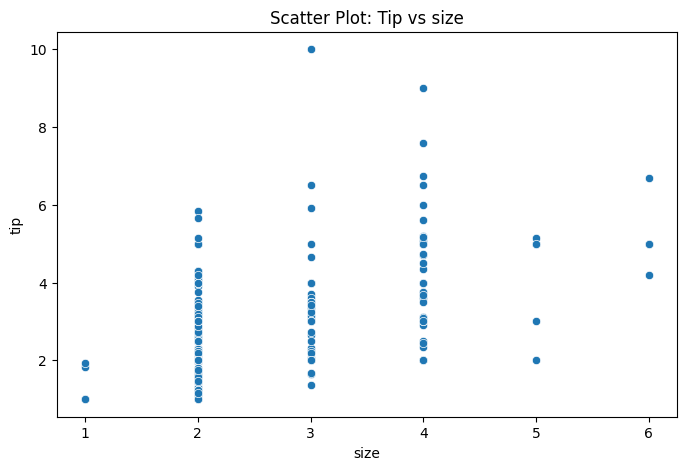

In [9]:
# Scatter plots for potential predictors
predictors = ['total_bill','sex', 'smoker', 'day', 'time', 'size']  # Adjust these based on actual columns

for predictor in predictors:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=data, x=predictor, y='tip')
    plt.title(f'Scatter Plot: Tip vs {predictor}')
    plt.show()

The scatter plots show integratity in data that will be further analyzed by rainbow test

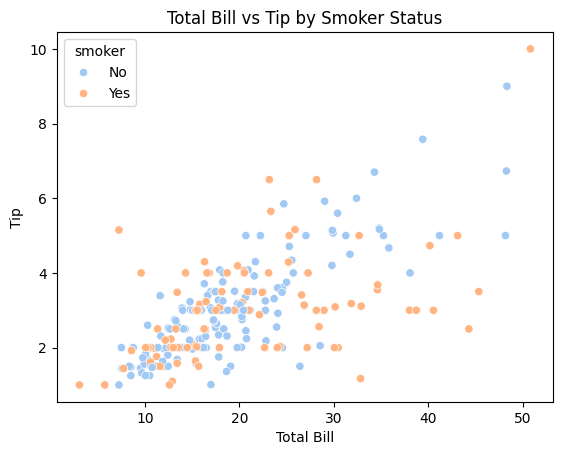

In [28]:
sns.scatterplot(data=data, x='total_bill', y='tip', hue='smoker', palette='pastel')
plt.title('Total Bill vs Tip by Smoker Status')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

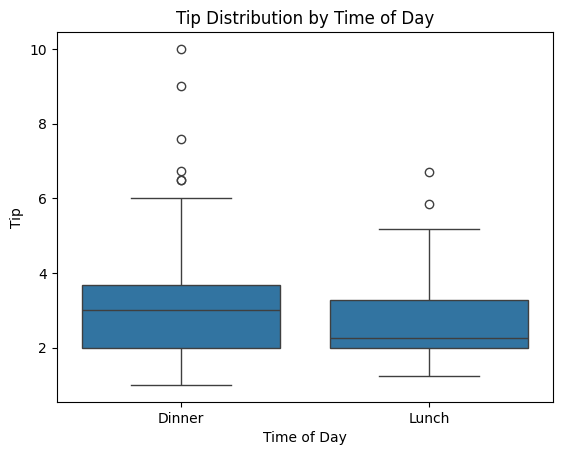

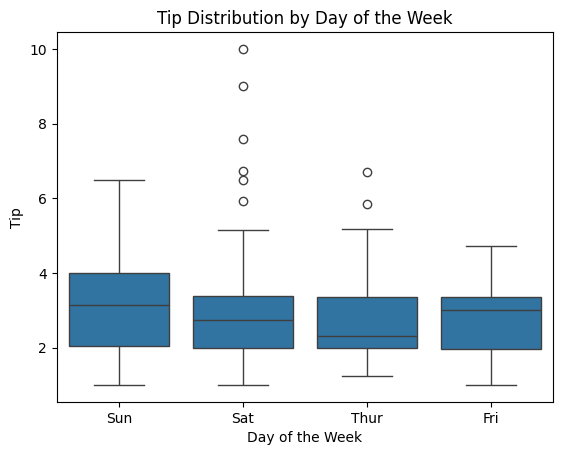

In [31]:
sns.boxplot(data=data, x='time', y='tip')
plt.title('Tip Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Tip')
plt.show()

sns.boxplot(data=data, x='day', y='tip')
plt.title('Tip Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Tip')
plt.show()

**Tip Distribution by Time of Day (Lunch vs. Dinner)**

Customers tend to tip more generously during dinner than lunch, both in terms of median and overall variability. This could be due to higher overall bills at dinner or different customer demographics and behaviors between lunch and dinner times. Restaurants may want to focus on optimizing service and customer experience during dinner to maintain or increase tip values.

**Tip Distribution by Day of the Week**

Higher tip values on weekends likely correlate with increased dining activity and larger group sizes. Restaurants may benefit from allocating more resources to weekends, such as extra staff or targeted promotions, to capitalize on the higher spending and tipping patterns observed.

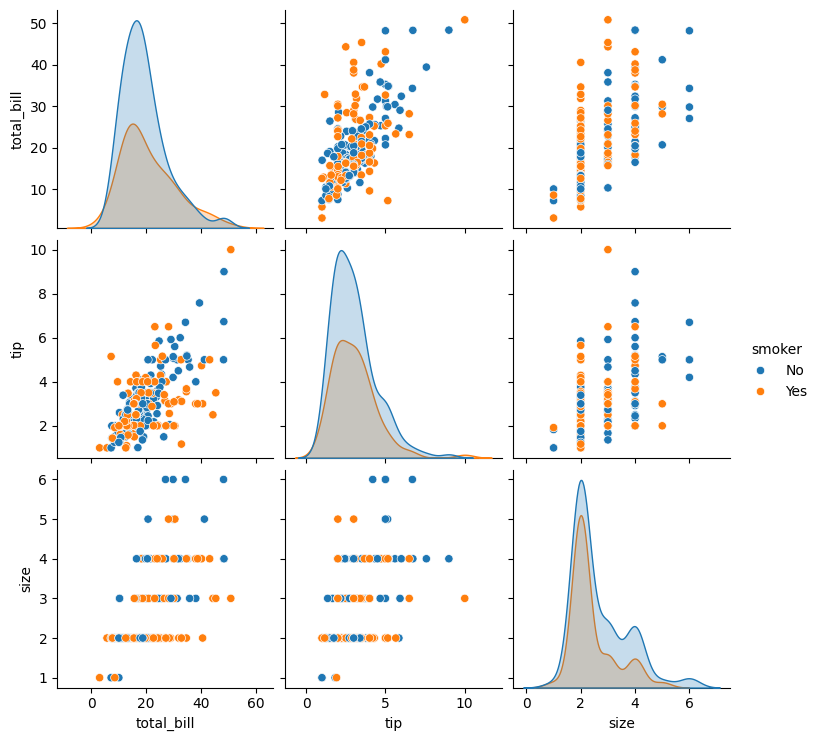

In [36]:
sns.pairplot(data, vars=['total_bill', 'tip', 'size'], hue='smoker')
plt.show()

 A positive relationship exists between total_bill and tip for both smokers and non-smokers. As the total bill increases, tips tend to increase.

 Both groups show similar trends, although smokers may have a slightly wider spread in the tip amounts for given total bills, suggesting more variability in tipping behavior.

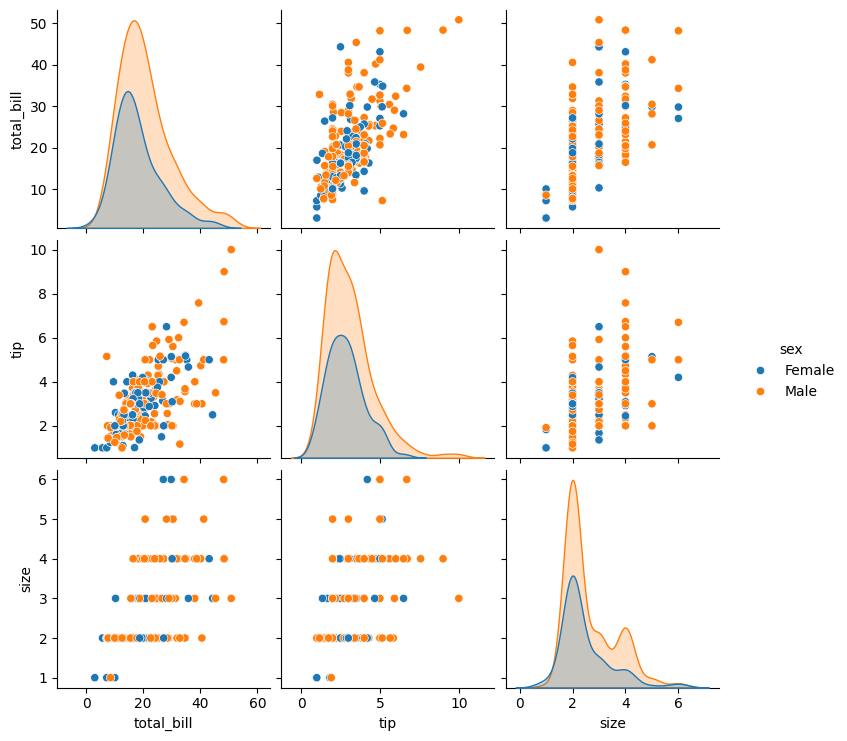

In [37]:
sns.pairplot(data, vars=['total_bill', 'tip', 'size'], hue='sex')
plt.show()

 There is a positive correlation between total_bill and tip for both male and female customers, meaning that higher total bills are generally associated with higher tips.

Male and female customers show a similar trend, though there may be slightly higher tip variability for male customers at a given total bill amount.

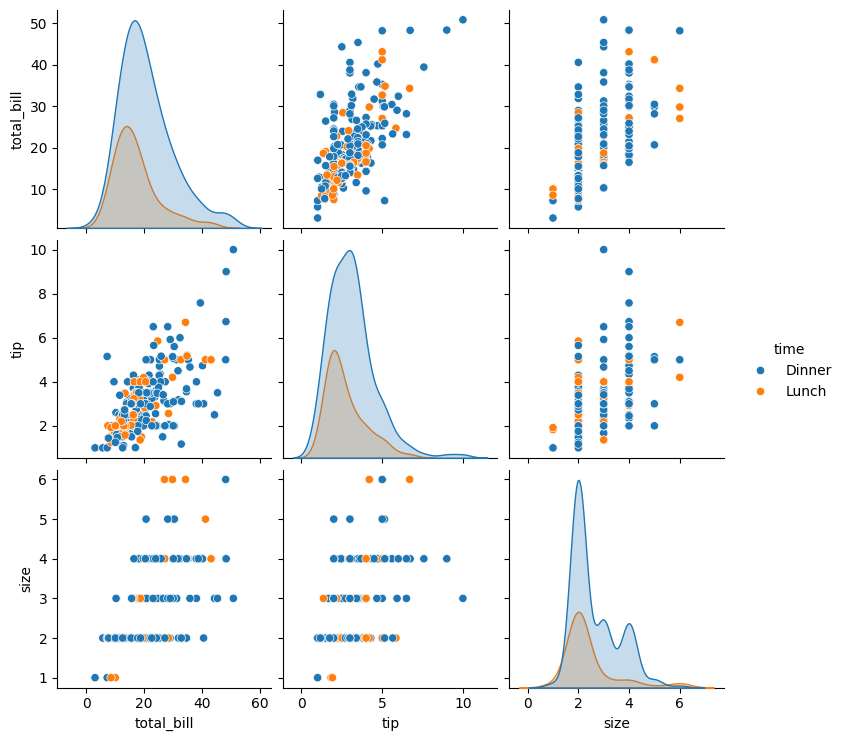

In [38]:
sns.pairplot(data, vars=['total_bill', 'tip', 'size'], hue='time')
plt.show()

Tips tend to be higher during dinner, likely reflecting higher spending and possibly larger groups or more elaborate meals. Restaurants might prioritize service quality during dinner hours to maintain or increase tip amounts.

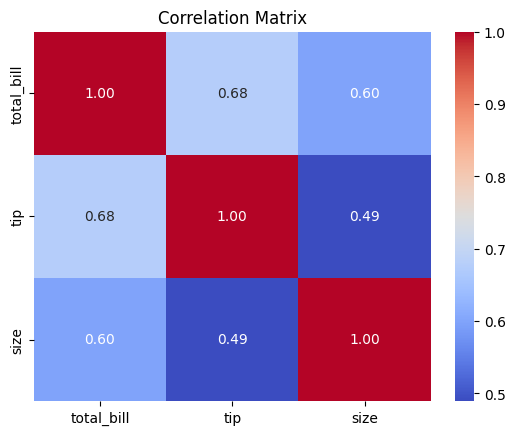

In [40]:
numerical_data = data.select_dtypes(include=['number'])

sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

The correlation coefficient between total_bill and tip is high, indicating a strong positive relationship. This means that as the total bill increases, the tip amount also tends to increase.

total_bill and size also show a moderate positive correlation, suggesting that larger groups tend to have higher bills. However, the correlation is not as strong as that between total_bill and tip, indicating variability in spending per group.

The correlation between tip and size is weaker compared to total_bill and tip. This suggests that while larger groups may give higher total tips, the increase is not as predictable as it is for total_bill.


In [44]:
from statsmodels.stats.diagnostic import linear_rainbow
X = data[['total_bill', 'size']]  # Adjust based on relevant predictors
y = data['tip']
X = sm.add_constant(X)

# Fit a simple linear regression model
model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)

print(f"Rainbow Test Statistic: {rainbow_stat}, p-value: {rainbow_p_val}")

Rainbow Test Statistic: 1.1902656646832817, p-value: 0.17048935693447634


In [5]:
X = data[['total_bill', 'size']].values  # Features (predictors)
y = data['tip'].values                   # Target (tip amount)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_preds)))
print("Linear Regression R^2:", r2_score(y_test, lr_preds))

# 2. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, ridge_preds)))
print("Ridge R^2:", r2_score(y_test, ridge_preds))

# 3. Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, lasso_preds)))
print("Lasso R^2:", r2_score(y_test, lasso_preds))

# 4. Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, dt_preds)))
print("Decision Tree R^2:", r2_score(y_test, dt_preds))

# 5. Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("Random Forest R^2:", r2_score(y_test, rf_preds))

# 6. Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_preds = svr_model.predict(X_test)
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, svr_preds)))
print("SVR R^2:", r2_score(y_test, svr_preds))

# 7. K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
print("KNN RMSE:", np.sqrt(mean_squared_error(y_test, knn_preds)))
print("KNN R^2:", r2_score(y_test, knn_preds))


Linear Regression RMSE: 0.805356827160701
Linear Regression R^2: 0.4811084097989494
Ridge RMSE: 0.8047555882326728
Ridge R^2: 0.4818828773627837
Lasso RMSE: 0.7686695421292249
Lasso R^2: 0.5273068720881756
Decision Tree RMSE: 1.0023492812551187
Decision Tree R^2: 0.1962183089778119
Random Forest RMSE: 0.9133503643578204
Random Forest R^2: 0.3326175906132479
SVR RMSE: 0.7312603678049858
SVR R^2: 0.572196812715273
KNN RMSE: 0.8599010859110602
KNN R^2: 0.40844253722501


Here we observe that SVR gives best results

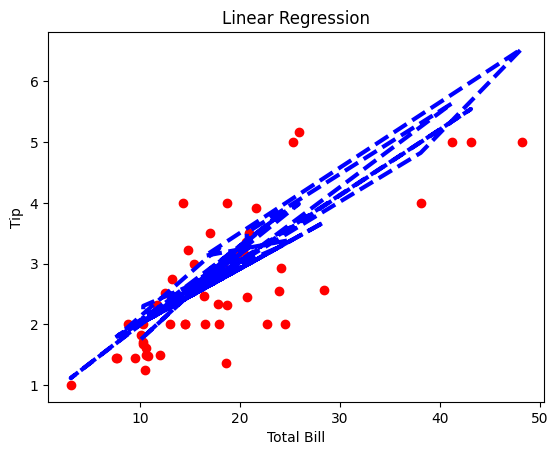

In [56]:
# Assuming 'total_bill' is the feature you want to plot against 'tip'
plt.scatter(X_test[:, 0], y_test, color='red')  # Use the first column of X_test (total_bill)

# Choose which model's predictions you want to plot
# Here, we'll use Linear Regression (lr_model)
lr_model = LinearRegression()  # Assuming lr_model was trained earlier
lr_model.fit(X_train, y_train)  # Re-train if necessary
y_pred = lr_model.predict(X_test)  # Get the predictions


plt.plot(X_test[:, 0], y_pred, color='blue', linewidth=3, linestyle='--')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression')
plt.show()

The scatter plot shows a positive trend: as the total_bill increases, the tip generally increases as well.


This is in line with the expectation that customers tend to tip more on larger bills, following either a percentage-based tipping approach or a higher fixed tip for larger meals.

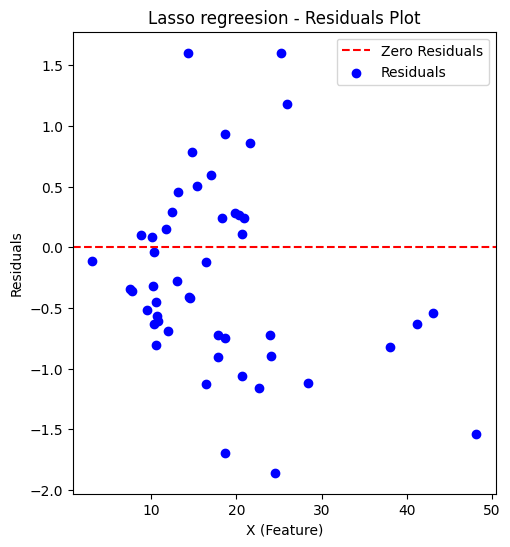

In [55]:
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))

    # Residuals Plot
plt.subplot(1, 2, 1)
plt.axhline(0, color='red', linestyle='--', label='Zero Residuals')
plt.scatter(X_test[:, 0], residuals, color='blue', label='Residuals')  # X_test is 2D, so use the first column
plt.title('Lasso regreesion - Residuals Plot')
plt.xlabel('X (Feature)')
plt.ylabel('Residuals')
plt.legend()


In [59]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Now you can use the model for predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

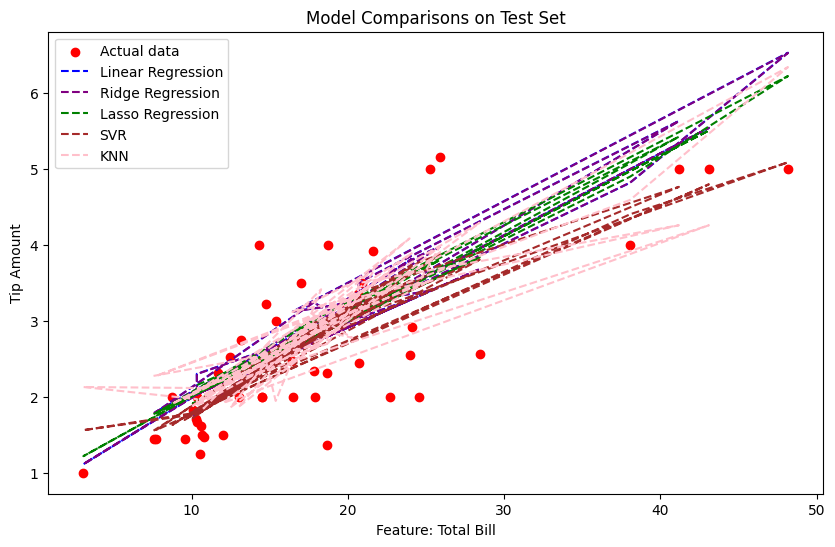

In [62]:
# Assuming you have already trained the models and obtained the predictions for each model
# such as y_pred_linear, y_pred_ridge, etc.

# Plotting the predictions
plt.figure(figsize=(10, 6))

# Actual data plot
# Use indexing instead of .iloc for NumPy arrays
plt.scatter(X_test[:, 0], y_test, color='red', label='Actual data')  # Plot the true values

# Plot predictions from each model
# Use indexing instead of .iloc for NumPy arrays
plt.plot(X_test[:, 0], y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test[:, 0], y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot(X_test[:, 0], y_pred_lasso, color='green', label='Lasso Regression', linestyle='--')
# Assuming y_pred_tree, y_pred_forest are defined in your previous code
plt.plot(X_test[:, 0], y_pred_svr, color='brown', label='SVR', linestyle='--')
plt.plot(X_test[:, 0], y_pred_knn, color='pink', label='KNN', linestyle='--')

# Plotting details
plt.title('Model Comparisons on Test Set')
# Accessing column name if original data was a DataFrame
# If 'X' was your original DataFrame before train_test_split
# plt.xlabel('Feature: ' + X.columns[0])
plt.xlabel('Feature: Total Bill') # If total_bill is your first feature as it's plotted above.
plt.ylabel('Tip Amount')  # Y-axis label for tip
plt.legend()
plt.show()

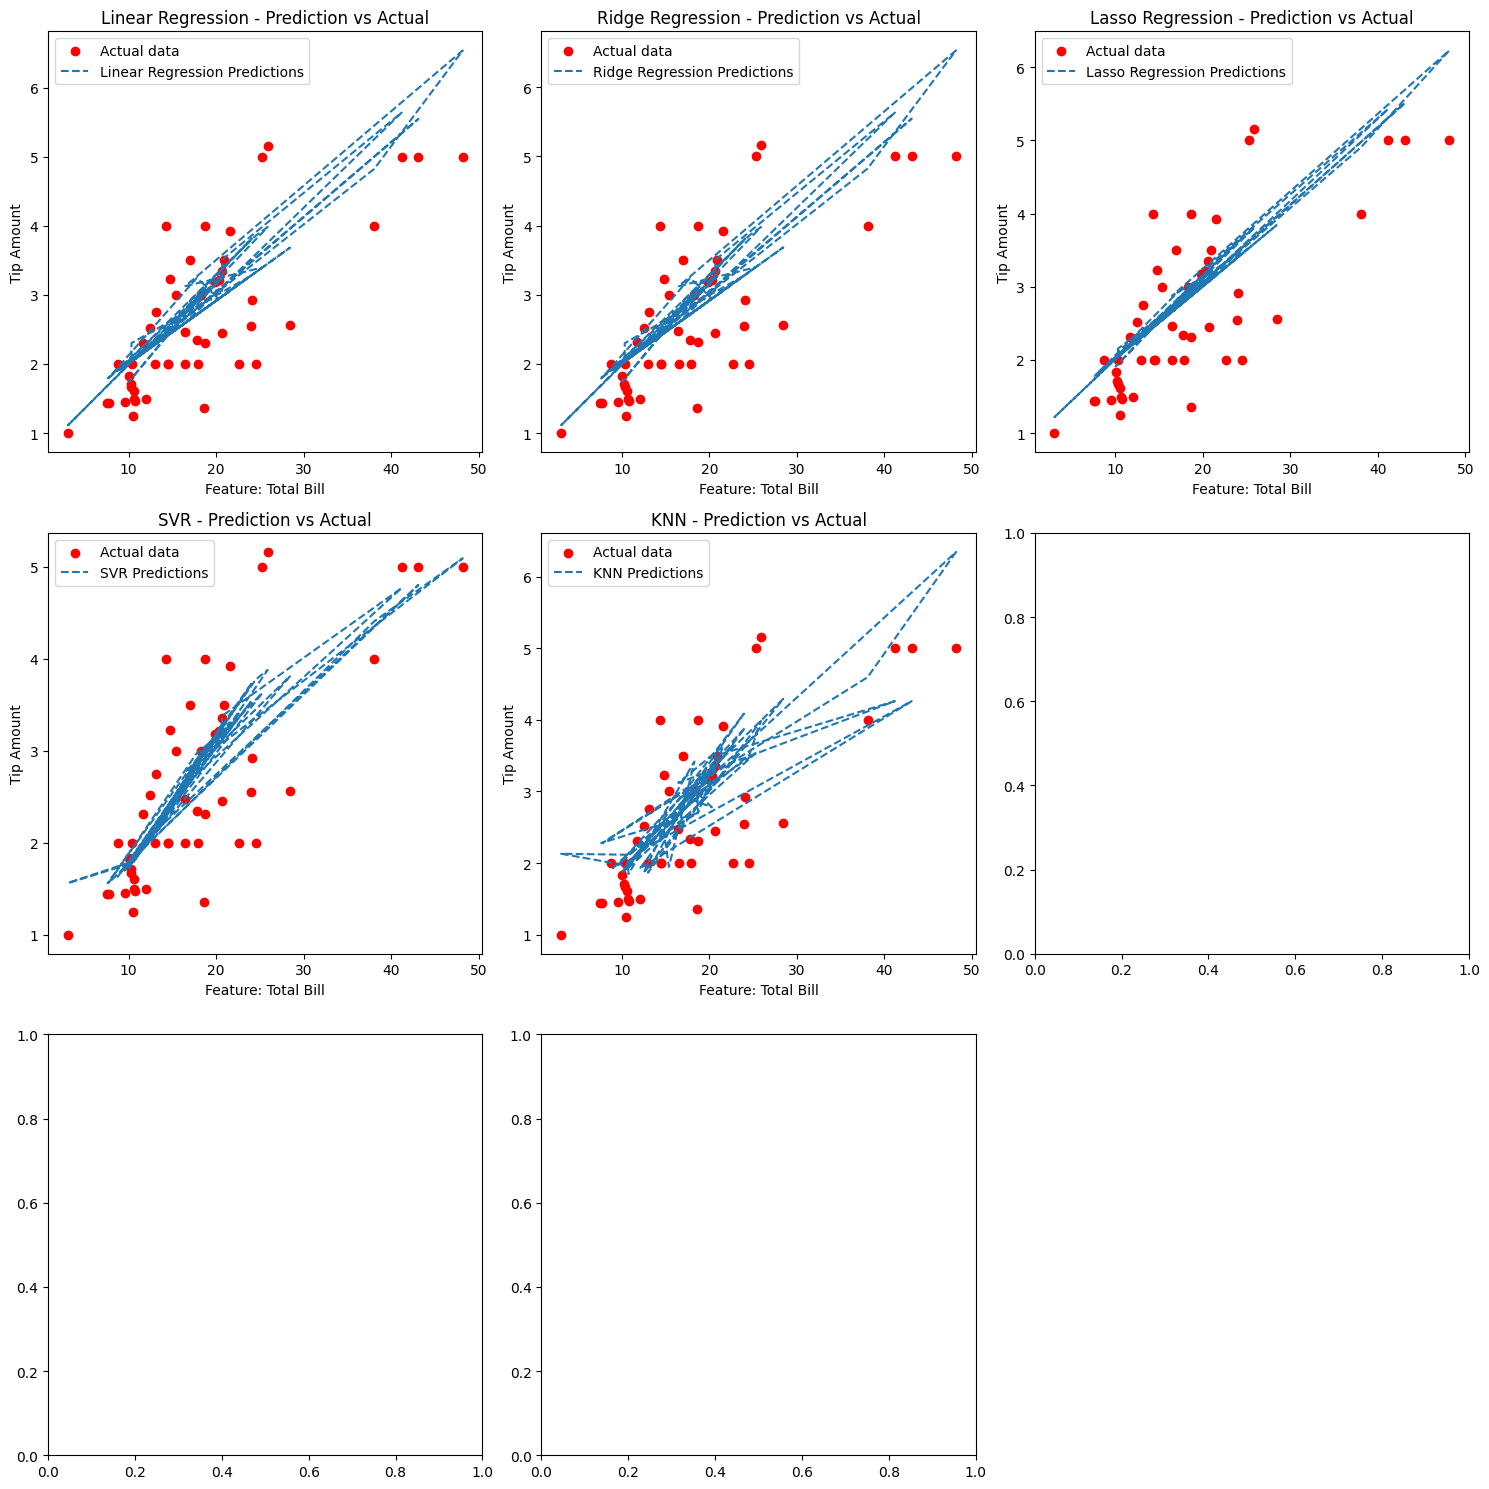

In [65]:
# Assuming you have already trained the models and obtained the predictions for each model
# such as y_pred_linear, y_pred_ridge, etc.

# Define the models and predictions
predictions = {
    'Linear Regression': y_pred_linear,
    'Ridge Regression': y_pred_ridge,
    'Lasso Regression': y_pred_lasso,
    'SVR': y_pred_svr,
    'KNN': y_pred_knn
}

# Plotting the predictions for each model in separate subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Create a 3x3 grid of subplots

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through each model and its prediction to create individual plots
for i, (model_name, y_pred) in enumerate(predictions.items()):
    ax = axes[i]
    ax.scatter(X_test[:, 0], y_test, color='red', label='Actual data')  # Plot the true values
    ax.plot(X_test[:, 0], y_pred, label=f'{model_name} Predictions', linestyle='--')

    # Title and labels for each plot
    ax.set_title(f'{model_name} - Prediction vs Actual')
    # Instead of using X_test.columns[0], which is incorrect for NumPy arrays,
    # manually provide the feature name or index
    ax.set_xlabel('Feature: Total Bill')  # Assuming 'total_bill' is the first feature
    ax.set_ylabel('Tip Amount')  # Y-axis label for tip
    ax.legend()

# Remove the empty subplot if there are fewer than 9 models
if len(predictions) < 9:
    fig.delaxes(axes[-1])

plt.tight_layout()  # Adjust subplots to avoid overlap
plt.show()